### **Importing Libraries and the Dataset**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Import Matplotlib the Basic library for data visualization
import matplotlib.pyplot as plt

# Import seaborn - Slightly advanced library for data visualization
import seaborn as sns

# Import the required library to compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# Import defaultdict from collections A dictionary output that does not raise a key error
from collections import defaultdict

# Impoort mean_squared_error : a performance metrics in sklearn
from sklearn.metrics import mean_squared_error


### **Load the dataset**

In [ ]:
# Importing the datasets
song_df = pd.read_csv('/content/drive/MyDrive/capstone/song_data.csv')
count_df = pd.read_csv('/content/drive/MyDrive/capstone/count_data.csv',
                     usecols=['user_id','song_id','play_count'])

### **Understanding the data by viewing a few observations**

In [ ]:
# Display first 10 records of count_df data
count_df.head(10)

,user_id,song_id,play_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [ ]:
# Display first 10 records of song_df data
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [ ]:
# Display info of count_df
count_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   user_id     2000000 non-null  object
 1   song_id     2000000 non-null  object
 2   play_count  2000000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 45.8+ MB


In [ ]:
# Display info of song_df
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999983 non-null   object
 2   release      999993 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


#### **The count data contains:**
*   **2000000 observations** and **3 columns**.
*   **user_id** and **sond_id** columns are of **object data type** but **play_count** column is of **numeric data type**.
*   There is **no missing value**.



#### **The song data contains:**
*   **1000000 observations** and **5 columns**.
*   **All the columns** are of **object data type** except the year column. The **year column** is of **numeric data type**.
*   The **title** and **release** columns contains 1000000 - 999983 = **17 null values**. All the other columns do not contain null values.

In [ ]:
# Left merge count_df and song_df on "song_id". Drop duplicates from song_df data simultaneously
df = pd.merge(count_df, song_df.drop_duplicates('song_id'), how='left')

# Drop the column 'Unnamed: 0'
  # Already droped while loading the dataset

## Name the obtained dataframe as "df"
  # Already named df

**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?
  - **Yes**, in this case encoding categorical feature **increase the execution performance** of the models although it does not impact the qualiy of the predictions

In [ ]:
# Apply label encoding for "user_id" and "song_id"
from sklearn.preprocessing import LabelEncoder

#saving the original df in df_copy
df_copy = df.copy()

#storing transformers in a dictionnary for decoding if needed
label_object = {}
categorical_columns = ['user_id','song_id']
for col in categorical_columns:
  labelencoder = LabelEncoder()
  labelencoder.fit(df[col])
  df[col] = labelencoder.fit_transform(df[col])
  label_object[col] = labelencoder

**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?
  - **Yes**, filtering the data will indeed **reduce the sparcity** in the matrices used for modelling. Hence **increasing the performance of the computation** as well as the **quality of the recommendations**

A dataset of size 2000000 rows x 7 columns can be quite large and may require a lot of computing resources to process. This can lead to long processing times and can make it difficult to train and evaluate your model efficiently.
In order to address this issue, it may be necessary to trim down your dataset to a more manageable size.

In [ ]:
# Get the column containing the users
users = df.user_id

# Create a dictionary that maps users(listeners) to the number of songs that they have listened to
playing_count = dict()

for user in users:
    # If we already have the user, just add 1 to their playing count
    if user in playing_count:
        playing_count[user] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[user] = 1

In [ ]:
# We want our users to have listened at least 90 songs
SONG_COUNT_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_songs in playing_count.items():

    if num_songs < SONG_COUNT_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [ ]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary that maps songs to its number of users(listeners)
playing_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their playing count
    if song in playing_count:
        playing_count[song] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[song] = 1

In [ ]:
# We want our song to be listened by at least 120 users to be considred
LISTENER_COUNT_CUTOFF = 120

remove_songs = []

for song, num_users in playing_count.items():
    if num_users < LISTENER_COUNT_CUTOFF:
        remove_songs.append(song)

df_final = df.loc[ ~ df.song_id.isin(remove_songs)]

Out of all the songs available, songs with play_count less than or equal to 5 are in almost 90% abundance. So for building the recommendation system let us consider only those songs.

In [ ]:
# Keep only records of songs with play_count less than or equal to (<=) 5
df_final = df_final[df_final.play_count<=5]

In [ ]:
# Check the shape of the data
df_final.shape

(117876, 7)

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [ ]:
# Display total number of unique user_id
df_final.user_id.nunique()

3155

Total number of unique song id

In [ ]:
# Display total number of unique song_id
df_final.song_id.nunique()

563

Total number of unique artists

In [ ]:
# Display total number of unique artists
df_final.artist_name.nunique()

232

#### **The data contains :**

*   **117876** observations
*   **3155** unique users
*   **563** unique songs

#### As per the number of unique users and songs, there is a possibility of 3155 * 563 = **1.776.265 interactions in the dataset**. But we only have **117.876 interactions** meeting our criterias(90 songs count per user, 120 users count per song and at most 5 play counts per song), i.e., **not every user has listened every song** in the dataset, which is quite understandable.This creates the **possibility of building a recommendation system to recommend products to the users which they have not interacted with**.


### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [ ]:
# Printing the top ten songs
df_final.song_id.value_counts()[:10]

song_id
8582    751
352     748
2220    713
1118    662
4152    652
5531    618
4448    609
6189    606
6293    583
1334    570
Name: count, dtype: int64

Most interacted users

In [ ]:
# Printing the top ten users
df_final.user_id.value_counts()[:10]

user_id
61472    243
15733    227
37049    202
9570     184
23337    177
10763    176
26616    175
9097     175
43041    174
65994    171
Name: count, dtype: int64

#### **The top user and song are the user with id 2548 and the song with id 8581**

*   The **top user** listened to **243 songs**
    * Since there are **563 songs**, it is **possible to make recommations** to this particular user and to all users in general. For this top user, there are 563 - 243 = **320 possible recommendations left**.
*   The **most popular song** was listened to by **751 users**
    * Since there are **3155 users**, there are 3155 - 751 = **2404 possible users left to whom we could recommend this song**.


Songs released on yearly basis

In [ ]:
# Find out the number of songs released in a year, use the songs_df
  # Hint: Use groupby function on the 'year' column
song_df.drop_duplicates('song_id').groupby('year').song_id.count().sort_values(ascending=False)[:10]

year
0       484284
2007     39340
2006     37486
2005     34872
2008     34684
2009     30966
2004     29564
2003     27323
2002     23450
2001     21570
Name: song_id, dtype: int64

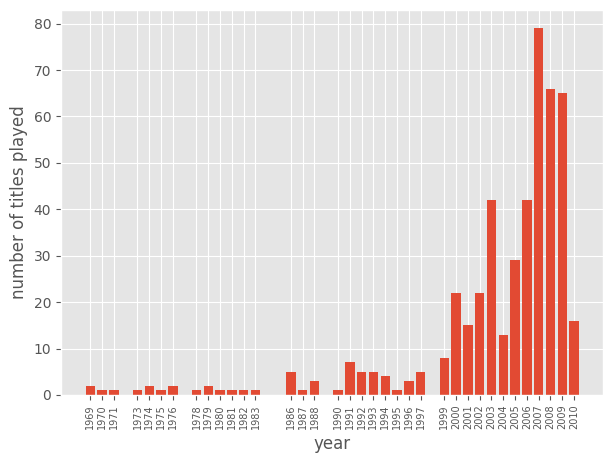

In [ ]:
# Create a barplot plot with y label as "number of titles played" and x -axis year
nbr_titles_played_by_year = df_final.groupby('year').title.nunique()

plt.style.use('ggplot')

# Set the figure size
plt.figure(figsize=(7, 5))
#from the previous cell, we could see there is an abnormal year 0, which seems to be
#a default, so we're dropping that year
plt.bar(x=nbr_titles_played_by_year.index[1:], height=nbr_titles_played_by_year[1:])

# Set the x label of the plot
plt.xlabel('year')

# Set the y label of the plot
plt.ylabel('number of titles played')

# Setting all the ticks
plt.xticks(ticks=nbr_titles_played_by_year.index[1:], rotation=90, size=7)

# Show the plot
plt.show()

#### **The number of titles played can be segmented into 3 groups.** The groups are created below by dividing the year colonne into 3 segments:

*   **[1969 - 1983]** : in this segment, the **number of titles played is very low, less or equal to 2**.
*   **[1986 - 1997]** : in this segment, the **number of titles played is less or equal to 7**, 1991 having 7.
*   **[1999 - 2010]** : in this segment, the **number of titles played vary beetween 8 and 79**, 1999 having the lowest and 2007 having the maximum.



**Think About It:** What other insights can be drawn using exploratory data analysis?
  - We can also **visualize the distribution of the play counts:**

<Axes: xlabel='play_count', ylabel='proportion'>

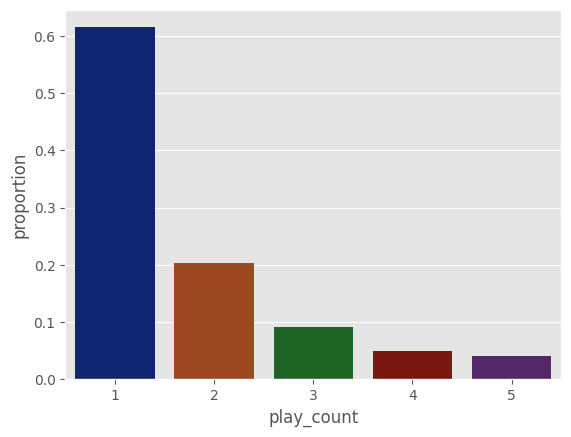

In [ ]:
data = df_final
sns.countplot(data=data, x=data.play_count, hue='play_count', palette='dark',
              legend=False, stat='proportion')

From the above figure, we can see:
 - **most of the songs, 60 percent** have been played only once and
 - **80 percent of the songs** have been **played less than 3 times**.

Now that we have explored the data, let's apply different algorithms to build recommendation systems.

**Note:** Use the shorter version of the data, i.e., the data after the cutoffs as used in Milestone 1.

## Building various models

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [ ]:
# Calculating average play_count
    # Hint: Use groupby function on the song_id column
play_avg = df_final.groupby('song_id').play_count.mean()

# Calculating the frequency a song is played
    # Hint: Use groupby function on the song_id column
play_freq = 100 * df_final.groupby('song_id').play_count.sum()

In [ ]:
# Making a dataframe with the average_count and play_freq
df_songs_count_freq = pd.DataFrame({'play_avg':play_avg, 'play_freq':play_freq})

# Let us see the first five records of the final_play dataset
df_songs_count_freq[:5]

,play_avg,play_freq
song_id,,
21,1.622642,43000
22,1.492424,19700
52,1.729216,72800
62,1.728070,19700
93,1.452174,16700


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [ ]:
# Build the function to find top n songs
def top_n_songs(df, n, min_playcount = 50):
  """
  It gives top n songs among those being played for more than min_playcount
  """
  # Finding products with minimum number of interactions
  recommendations = df[df.play_freq > min_playcount]

  # Sorting values with respect to average rating
  recommendations = recommendations.sort_values(by='play_avg', ascending=False)

  return list(recommendations.index[:n])

In [ ]:
# Recommend top 10 songs using the function defined above
top_n_songs(df_songs_count_freq, 10)

[7224, 8324, 6450, 9942, 5531, 5653, 8483, 2220, 657, 614]

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [ ]:
# Install the surprise package using pip. Uncomment and run the below code to do the same
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357251 sha256=581b6aafdc74cb64eb37410fb69b8c067e5d74b9185552bb41f746675554cfc9
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
# Import necessary libraries
from surprise import similarities
from sklearn.metrics.pairwise import cosine_similarity

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader


# Class for loading datasets
from surprise.dataset import Dataset


# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV


# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split


# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic


# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD


# For implementing KFold cross-validation
from surprise.model_selection import KFold


# For implementing clustering-based recommendation system
from surprise import CoClustering

### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE, and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

In [ ]:
def precision_recall_at_k(model, k=30, threshold=1.5, testset=None):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    #Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()

    for uid, playing_count in user_est_true.items():

        # Sort play count by estimated value
        playing_count.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in playing_count)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in playing_count[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in playing_count[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    #Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)),3)
    #Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)),3)

    accuracy.rmse(predictions)
    print('Precision: ', precision) #Command to print the overall precision
    print('Recall: ', recall) #Command to print the overall recall
    print('F_1 score: ', round((2*precision*recall)/(precision+recall),3)) # Formula to compute the F-1 score.

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5?
- Impact of the threshold on recall and precision
 - If we decrease the threshold, most of the predictions would be above the threshold, hence many of the items would be recommended. As the data is imbalanced (many  low playcounts), The TP rate would increase and Precision and Recall would increase.  
 - If we **increase the threshold**, most of the prediction would be below the threshold, hence few songs would be recommended. As the data is imbalanced (very few high playcounts), the TP rate would decrease. **So Precision and Recall would decrease**.
 - So a good threshold is a medium threshold but in the present case most of the predictions are around 1, so 1.5 is a good threshold. Moreover 1 playcount is not enough to say a user like a song. The higher the the threshold, the higher the likely hood the user would love the song.

- Evaluation parameters
 - To compute **precision and recall**, a **threshold of 1.5 and k value of 30 will be considered for the recommended and relevant ratings**.

- Performance metrice selection
 - FP and FN costs are high in the present case. If the FP rate is high (precision is low), we recommend products that the user might not buy. And, if FN rate is high (recall is low) we fail to recommend relevant products that the user might purchase. Therefore, precision and recall need to be optimized. So the **correct performance measure is the F_1 score**.

Below we are loading the **dataset**, which is a **pandas dataframe**, into a **different format called `surprise.dataset.DatasetAutoFolds`** which is required by this library. To do this we will be **using the classes `Reader` and `Dataset`**

You will also notice here that we read the dataset by providing a scale of ratings. However, as you would know, we do not have ratings data of the songs. In this case, we are going to use play_count as a proxy for ratings with the assumption that the more the user listens to a song, the higher the chance that they like the song

In [ ]:
# Instantiating Reader scale with expected rating scale
 #use rating scale (0, 5)
reader = Reader(rating_scale=(0, 5))

# Loading the dataset
 # Take only "user_id","song_id", and "play_count"
data = Dataset.load_from_df(df_final[['user_id',	'song_id', 'play_count']],
                            reader=reader)

# Splitting the data into train and test dataset
 # Take test_size = 0.4, random_state = 42
trainset, testset = train_test_split(data, test_size=0.4, random_state=42)

**Think About It:** How changing the test size would change the results and outputs?

As the data is imbalanced :
 - If we increase the test size, the performance of the model increase, as more diversity will appear in the testset
 - And conversely, if we decrease, the test size, the performance  decrease.



In [ ]:
# Build the default user-user-similarity model
sim_options=dict(name='cosine', user_based=True)

# KNN algorithm is used to find desired similar items
 # Use random_state = 1
sim_user_user_model = KNNBasic(sim_options=sim_options, random_state=1,
                               verbose=True)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user_model.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
 # Use sim_user_user model
precision_recall_at_k(sim_user_user_model, testset=testset)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0878
Precision:  0.396
Recall:  0.692
F_1 score:  0.504


The F_1 score is not good, this is likely due to the imbalanced data. We need more observations.  

In [ ]:
# selecting a sample user with a listened song, let's choose the first observation
user_id_interaction, song_id_interaction, play_count_interaction = df_final[['user_id'
, 'song_id', 'play_count']].iloc[0].values
print('user_id chosen is:', user_id_interaction,
      '\nsong_id chosen listened by the user is:', song_id_interaction,
      '\nand the play count of this pair is:', play_count_interaction)

user_id chosen is: 6958 
song_id chosen listened by the user is: 447 
and the play count of this pair is: 1


In [ ]:
# Predicting play_count for a sample user with a listened song
# Use any user id  and song_id
sim_user_user_model.predict(user_id_interaction, song_id_interaction, r_ui=1)

Prediction(uid=6958, iid=447, r_ui=1, est=1.1222839992769744, details={'actual_k': 40, 'was_impossible': False})

In [ ]:
# Function to find the list of users who have not listened to the song song_id.
def n_users_not_listened_song(n, data, song_id):
    users_listened_song = set(data[data['song_id'] == song_id]['user_id'])
    all_users = set(data['user_id'])
    # n is the number of elements to get in the list
    return list(all_users.difference(users_listened_song))[:n]

In [ ]:
# Randomly choosing a song_id
song_id_no_interaction = df_final.song_id.values[10]

# Finding a user who has not listened to the song
user_id_no_interaction = n_users_not_listened_song(1, df_final,
                                                   song_id_no_interaction)[0]

print('user_id chosen is:', user_id_no_interaction,
      '\nsong_id chosen and not listened by the user is:', song_id_no_interaction)

user_id chosen is: 8194 
song_id chosen and not listened by the user is: 1756


In [ ]:
# Predicting play_count for a sample user with a song not-listened by the user
 #predict play_count for any sample user
sim_user_user_model.predict(user_id_no_interaction, song_id_no_interaction)

Prediction(uid=8194, iid=1756, r_ui=None, est=1.7469530495676857, details={'actual_k': 40, 'was_impossible': False})

**The predicted play count** for the **interacted user-song pair is 1.2**. The **actual play count is 1**, so the prediction is pretty good.

**The predicted play count** the for the **user-song pair with no interaciton is 1.74**

Now, let's try to tune the model and see if we can improve the model performance.

In [ ]:
# Setting up parameter grid to tune the hyperparameters
params_grid = dict(k=[60, 80], min_k=[40, 50],
                   sim_options=dict(name=['msd', 'cosine'],
                                    #min_support = [5, 10, 20],
                                    user_based=[True]))

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid=params_grid, cv=3, measures=['rmse'],
                  n_jobs=-1)

# Fitting the data
 # Use entire data for GridSearch
gs.fit(data)

# Best RMSE score
print("Best RMSE score:", gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print("Best_params:", gs.best_params['rmse'])

Best RMSE score: 1.053329957920412
Best_params: {'k': 80, 'min_k': 40, 'sim_options': {'name': 'msd', 'user_based': True}}


In [ ]:
# Train the best model found in above gridsearch
# Using the optimal similarity measure for user-user based collaborative filtering
best_params = gs.best_params['rmse']
best_k = best_params['k']
best_min_k = best_params['min_k']
best_sim_options = best_params['sim_options']

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_tuned_model = KNNBasic(k = best_k, min_k=best_min_k,
                                     sim_options=best_sim_options,
                                     random_state=1, verbose=False)

# Training the algorithm on the trainset
sim_user_user_tuned_model.fit(trainset)

# Let us compute precision@k and recall@k also
precision_recall_at_k(sim_user_user_tuned_model, testset=testset)

RMSE: 1.0571
Precision:  0.411
Recall:  0.682
F_1 score:  0.513


The F1 score of this tuned model is 0.513. So it has silightly increased compared to the baseline model which was 0.504.

In [ ]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
user_id_interaction, song_id_interaction, play_count_interaction = 6958, 1671, 2
sim_user_user_tuned_model.predict(user_id_interaction, song_id_interaction,
                                  r_ui = play_count_interaction)

Prediction(uid=6958, iid=1671, r_ui=2, est=1.4997599871491851, details={'actual_k': 80, 'was_impossible': False})

In [ ]:
# Function to find the list of songs who have not been listened by user_id.
def n_songs_not_listened_user(n, data, user_id):
    songs_listened_user = set(data[data['user_id'] == user_id]['song_id'])
    all_songs = set(data['song_id'])
    # n is the number of elements to get in the list
    return list(all_songs.difference(songs_listened_user))[:n]

In [ ]:
user_id_no_interaction = 6958

# Finding a song who has not been listened by the user above
song_id_no_interaction = n_songs_not_listened_user(1, df_final, user_id_no_interaction)[0]

print('user_id chosen is:', user_id_no_interaction,
      '\nsong_id chosen and not listened by the user is:', song_id_no_interaction)

user_id chosen is: 6958 
song_id chosen and not listened by the user is: 2048


In [ ]:
# Verifying that the user has not listened to the song
df_final.query('user_id == @user_id_no_interaction & song_id == @song_id_no_interaction')

,user_id,song_id,play_count,title,release,artist_name,year


In [ ]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
sim_user_user_tuned_model.predict(user_id_no_interaction, song_id_no_interaction)

Prediction(uid=6958, iid=2048, r_ui=None, est=1.533851879295488, details={'actual_k': 80, 'was_impossible': False})

**The predicted play count** for the **interacted user-song pair is 1.49**. The **actual play count is 2**, so the prediction is far from the actual.

**The predicted play count** the for the **user-song pair with no interaciton is 1.53**

**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?
  - Yes, we can get the list of the songs similar to a song

In [ ]:
# Use inner id 0
sim_user_user_tuned_model.get_neighbors(iid=0, k=5)

[31, 82, 90, 116, 125]

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [ ]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended song ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot(index = 'user_id',
                                               columns = 'song_id',
                                               values = 'play_count')

    user_songs = user_item_interactions_matrix.loc[user_id]
    # Extracting those song ids which the user_id has not played yet
    non_played_songs = user_songs[user_songs.isnull()].index.tolist()

    # Looping through each of the song ids which user_id has not interacted yet
    for song_id in non_played_songs:

        # Predicting the users for those non played song ids by this user
        est = algo.predict(user_id, song_id).est

        # Appending the predicted play_counts
        recommendations.append((song_id, est))

    # Sorting the predicted play_counts in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)

    # Returing top n highest predicted play_count songs for this user
    return recommendations[:top_n]

In [ ]:
# Make top 5 recommendations for any user_id with a similarity-based recommendation engine
recommendations = get_recommendations(df_final, user_id_interaction, 5,
                                      sim_user_user_tuned_model)

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
recommendations_df = pd.DataFrame(recommendations, columns=['song_id', 'predicted_play_count'])
recommendations_df

,song_id,predicted_play_count
0,5531,2.212500
1,2220,2.200000
2,6860,2.162126
3,7496,2.121104
4,657,2.119850


**Above we can see the list of the songs recommended by the user-user colaborative filtering model**.
 - the top recommendation is the song 7224 with 2.93 play_counts.
 - the fith recommendation is the song 4831 with 2.34 playcounts.
 - all the recommended songs have a predicted playcounts greater than 2.


### Correcting the play_counts and Ranking the above songs

In [ ]:
def ranking_songs(recommendations, playing_count):
  # Sort the songs based on play counts
  ranked_songs = playing_count.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()

  # Merge with the recommended songs to get predicted play_counts
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_play_count'] = ranked_songs['predicted_play_count'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # Sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_play_count', ascending = False)

  return ranked_songs

**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?
 - we can correct the predictions of the songs by using the total play_count of the song. The intuition behind is the higher the playcount the higher the likely hood the song will be liked. So we can add the quantity 1/np.sqrt(n) to have optimistic predictions or in contrario we can substract that quantity to have play count below 5.
 - So the confidence interval of the predictions could be seen as : predicted_prediction - 1/np.sqrt(n), predicted_prediction + 1/np.sqrt(n)

In [ ]:
# Applying the ranking_songs function on the final_play data
ranking_songs(recommendations, df_songs_count_freq)

,song_id,play_freq,predicted_play_count,corrected_play_count
1,5531,142700,2.212500,2.209853
0,2220,158300,2.200000,2.197487
3,6860,36700,2.162126,2.156906
2,7496,62800,2.121104,2.117114
4,657,33500,2.119850,2.114387


**As expected, the corrected play counts are slightly lower than the predicted ones**

### Item Item Similarity-based collaborative filtering recommendation systems

In [ ]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance
# Declaring the similarity options
similarity_options = dict(name='cosine', user_based=False)

# KNN algorithm is used to find desired similar items. Use random_state=1
sim_item_item_model = KNNBasic(sim_options=similarity_options,
                               random_state=1, verbose=False)

# Train the algorithm on the trainset, and predict ratings for the test set
sim_item_item_model.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score
precision_recall_at_k(sim_item_item_model, testset=testset)

RMSE: 1.0394
Precision:  0.307
Recall:  0.562
F_1 score:  0.397


**The F1 score of this basic item-item colaborative filtering model is 0.39**
- This is not a good score and is less than the F1 score of this basic user-user colaborative filtering model
- So for this case, considering similar user seems to be better than considering similar items when building the model.

In [ ]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) listened to by the user
user_id_interaction, song_id_interaction, play_count_interaction = 6958, 1671, 2
sim_item_item_model.predict(user_id_interaction, song_id_interaction,
                                  r_ui = play_count_interaction)

Prediction(uid=6958, iid=1671, r_ui=2, est=1.3614157231762556, details={'actual_k': 20, 'was_impossible': False})

In [ ]:
song_id_no_interaction = 1671

# Finding a user who has not listened to the song
user_id_no_interaction = n_users_not_listened_song(1, df_final,
                                                   song_id_no_interaction)[0]

print('user_id chosen is:', user_id_no_interaction,
      '\nsong_id chosen and not listened by the user is:', song_id_no_interaction)

user_id chosen is: 8194 
song_id chosen and not listened by the user is: 1671


In [ ]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
sim_item_item_model.predict(user_id_no_interaction, song_id_no_interaction)

Prediction(uid=8194, iid=1671, r_ui=None, est=1.6455179645415152, details={'actual_k': 40, 'was_impossible': False})

**The predicted play count** for the **interacted user-song pair is 1.36**. The **actual play count is 2**, so the prediction is far from the actual. The number of neighbors available was **20**.

**The predicted play counts** the for the **user-song pair with no interaciton is 1.64.**

In [ ]:
# Apply grid search for enhancing model performance
# Setting up parameter grid to tune the hyperparameters
params_grid_item = dict(k=[30, 50], min_k=[3, 6, 9],
                   sim_options=dict(name=['cosine', 'msd'],
                                    min_support = [9, 20],
                                    user_based=[False]))

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid=params_grid_item, cv=3,
                  measures=['rmse'], n_jobs=-1)

# Fitting the data
gs.fit(data)

# Find the best RMSE score
print("Best RMSE score:", gs.best_score['rmse'])

# Extract the combination of parameters that gave the best RMSE score
print("best_params:", gs.best_params['rmse'])

Best RMSE score: 1.0263725500183078
best_params: {'k': 30, 'min_k': 3, 'sim_options': {'name': 'msd', 'min_support': 9, 'user_based': False}}


**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).
  - Choosing the right set of parameters is critical to some algorithms.
  - In this case, the similarity options and the number of neighbors enhance the performance of the models

In [ ]:
# Apply the best model found in the grid search
# Using the optimal similarity measure for item-item based collaborative filtering
best_params_item = gs.best_params['rmse']
best_k_item = best_params_item['k']
best_min_k_item = best_params_item['min_k']
best_sim_options_item = best_params_item['sim_options']

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_tuned_model = KNNBasic(k = best_k_item, min_k=best_min_k_item,
                            sim_options=best_sim_options_item, randm_state=1,
                            verbose=False)

# Training the algorithm on the trainset
sim_item_item_tuned_model.fit(trainset)

# Let us compute precision@k and recall@k, f1_score and RMSE
precision_recall_at_k(sim_item_item_tuned_model,  testset=testset)

RMSE: 1.0354
Precision:  0.394
Recall:  0.625
F_1 score:  0.483


**The performance has increased compared to the baseline item-item model:**
 - The F1 score of this tuned model is 0.49 while the the F1 score of the baseline item-item model was 0.39. So the perfomance has increased by 0.1 points.

In [ ]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
user_id_interaction, song_id_interaction, play_count_interaction = 6958, 1671, 2
sim_item_item_tuned_model.predict(user_id_interaction, song_id_interaction,
                                  r_ui = play_count_interaction)

Prediction(uid=6958, iid=1671, r_ui=2, est=1.4512884989967099, details={'actual_k': 15, 'was_impossible': False})

In [ ]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not listened to by the user
user_id_no_interaction, song_id_no_interaction = (6958, 3232)
sim_item_item_tuned_model.predict(user_id_no_interaction, song_id_no_interaction)

Prediction(uid=6958, iid=3232, r_ui=None, est=1.0, details={'actual_k': 4, 'was_impossible': False})

**The predicted play count** for the **interacted user-song pair is 1.45**. The **actual play count is 2**, so the prediction is far from the actual. The number of neighbors available was **15**.

**The predicted play count** the for the **user-song pair with no interaciton is 1.69.**

In [ ]:
# Find five most similar items to the item with inner id 0
sim_item_item_tuned_model.get_neighbors(iid=0, k=5)

[351, 324, 491, 128, 124]

In [ ]:
# Making top 5 recommendations for any user_id  with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_final, user_id_interaction, 5,
                                      sim_item_item_tuned_model)

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
recommendations_df = pd.DataFrame(recommendations, columns=['song_id', 'predicted_play_count'])
recommendations_df

,song_id,predicted_play_count
0,9160,1.963010
1,2342,1.960285
2,771,1.917327
3,4327,1.820176
4,4949,1.772752


In [ ]:
# Applying the ranking_songs function
ranking_songs(recommendations, df_songs_count_freq)

,song_id,play_freq,predicted_play_count,corrected_play_count
2,9160,23800,1.963010,1.956528
4,2342,14600,1.960285,1.952009
0,771,28100,1.917327,1.911362
3,4327,23700,1.820176,1.813681
1,4949,25900,1.772752,1.766538


**Above we can see the list of the songs recommended by the user-user colaborative filtering model**.
 - The songs recommended by this model vary from the ones recommended by the user-user model
 - The predicted play counts vary beetwen 1.96 and 1.77


### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [ ]:
# Build baseline model using svd
svd = SVD(random_state=1)

# Training the algorithm on the trainset
svd.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd, testset=testset)

RMSE: 1.0252
Precision:  0.41
Recall:  0.633
F_1 score:  0.498


In [ ]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
user_id_interaction, song_id_interaction, play_count_interaction = 6958, 1671, 2
svd.predict(user_id_interaction, song_id_interaction,
                                  r_ui = play_count_interaction)

Prediction(uid=6958, iid=1671, r_ui=2, est=1.267473397214638, details={'was_impossible': False})

In [ ]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
user_id_no_interaction, song_id_no_interaction = (6958, 3232)
svd.predict(user_id_no_interaction, song_id_no_interaction)

Prediction(uid=6958, iid=3232, r_ui=None, est=1.5561675084403663, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [ ]:
# Set the parameter space to tune
params = dict(n_epochs=[45, 60], lr_all=[0.0001, 0.005], reg_all=[0.05, 0.1],
              reg_bu=[0.05, 0.1])

# Performe 3-fold grid-search cross-validation
gs = GridSearchCV(SVD, param_grid=params, n_jobs=-1, measures=['rmse'], cv=3)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0042567317892475
{'n_epochs': 60, 'lr_all': 0.005, 'reg_all': 0.1, 'reg_bu': 0.1}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).
 - This svd algorithm has a lot of tunnable parameters.
 - Tweeking theses parameters might improve the predictions.

In [ ]:
# Building the optimized SVD model using optimal hyperparameters
best_params_svd = gs.best_params['rmse']
best_n_epochs = best_params_svd['n_epochs']
best_lr = best_params_svd['lr_all']
best_reg = best_params_svd['reg_all']
best_reg_bu = best_params_svd['reg_bu']

svd_tuned = SVD(n_epochs=best_n_epochs, lr_all=best_lr, reg_all=best_reg,
                reg_bu=best_reg_bu, random_state=1)

# Train the algorithm on the trainset
svd_tuned.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_tuned, testset=testset)

RMSE: 1.0078
Precision:  0.416
Recall:  0.619
F_1 score:  0.498


The performance of this tuned model has not increased compared to the baseline svd model

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
user_id_interaction, song_id_interaction, play_count_interaction = 6958, 1671, 2
svd_tuned.predict(user_id_interaction, song_id_interaction,
                                  r_ui = play_count_interaction)

Prediction(uid=6958, iid=1671, r_ui=2, est=1.466802714386287, details={'was_impossible': False})

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count
user_id_no_interaction, song_id_no_interaction = (6958, 3232)
svd_tuned.predict(user_id_no_interaction, song_id_no_interaction)

Prediction(uid=6958, iid=3232, r_ui=None, est=1.5208469366289472, details={'was_impossible': False})

**The predicted play count** for the **interacted user-song pair is 1.48**. The **actual play count is 2**, so the prediction is far from the actual.

**The predicted play count** the for the **user-song pair with no interaction is 1.54.**

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
recommendations = get_recommendations(df_final, user_id_interaction, 5,
                                      sim_item_item_tuned_model)

In [ ]:
# Ranking songs based on above recommendations
recommendations_df = pd.DataFrame(recommendations, columns=['song_id', 'predicted_play_count'])
recommendations_df

,song_id,predicted_play_count
0,9160,1.963010
1,2342,1.960285
2,771,1.917327
3,4327,1.820176
4,4949,1.772752


**Above we can see the list of the songs recommended by the matrix factorization colaborative filtering model**.
 - The songs recommended by this model are the ones recommended by the item-item model
 - The predicted play counts vary beetwen 1.96 and 1.77


### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [ ]:
# Make baseline clustering model
clustering_model = CoClustering(random_state=1)

# Train the algorithm on the trainset
clustering_model.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(clustering_model, testset=testset)

RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


In [ ]:
# Making prediction for user_id 6958 and song_id 1671
user_id_interaction, song_id_interaction, play_count_interaction = 6958, 1671, 2
clustering_model.predict(user_id_interaction, song_id_interaction,
                                  r_ui = play_count_interaction)

Prediction(uid=6958, iid=1671, r_ui=2, est=1.2941824757363074, details={'was_impossible': False})

In [ ]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not listened to by the user
user_id_no_interaction, song_id_no_interaction = (6958, 3232)
clustering_model.predict(user_id_no_interaction, song_id_no_interaction)

Prediction(uid=6958, iid=3232, r_ui=None, est=1.4785259100797417, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [1, 3, 10], 'n_cltr_i': [1, 3, 10 ],
              'n_epochs': [10, 30, 40]}

# Performing 3-fold grid search cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0292797210629505
{'n_cltr_u': 1, 'n_cltr_i': 1, 'n_epochs': 10}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).
 - The coclustering algorithm has some tunnable parameters.
 - Tweeking theses parameters might improve the predictions.

In [ ]:
# Train the tuned Coclustering algorithm
best_params_clust = gs.best_params['rmse']
best_n_cltr_u = best_params_clust['n_cltr_u']
best_n_cltr_i = best_params_clust['n_cltr_i']
best_n_epochs = best_params_clust['n_epochs']

clustering_model_tuned = CoClustering(n_cltr_u=best_n_cltr_u,
                                      n_cltr_i=best_n_cltr_i,
                                      n_epochs=best_n_epochs,
                                      random_state=1)

# Train the algorithm on the trainset
clustering_model_tuned.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(clustering_model_tuned, testset=testset)

RMSE: 1.0315
Precision:  0.395
Recall:  0.587
F_1 score:  0.472


The performance of this tuned model has not increased compared to the baseline coclustering model.

In [ ]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
user_id_interaction, song_id_interaction, play_count_interaction = 6958, 1671, 2
clustering_model_tuned.predict(user_id_interaction, song_id_interaction,
                                  r_ui = play_count_interaction)

Prediction(uid=6958, iid=1671, r_ui=2, est=1.1257867112267959, details={'was_impossible': False})

In [ ]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count
user_id_no_interaction, song_id_no_interaction = (6958, 3232)
clustering_model_tuned.predict(user_id_no_interaction, song_id_no_interaction)

Prediction(uid=6958, iid=3232, r_ui=None, est=1.3101301455702306, details={'was_impossible': False})

**The predicted play count** for the **interacted user-song pair is 1.12**. The **actual play count is 2**, so the prediction is far from the actual.

**The predicted play count** the for the **user-song pair with no interaction is 1.31.**

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
recommendations = get_recommendations(df_final, user_id_interaction, 5,
                                      clustering_model_tuned)

### Correcting the play_count and Ranking the above songs

In [ ]:
# Ranking songs based on the above recommendations
ranking_songs(recommendations, df_songs_count_freq)

,song_id,play_freq,predicted_play_count,corrected_play_count
1,7224,36100,2.926402,2.921138
2,6450,26300,2.166664,2.160498
3,8324,25200,2.143103,2.136803
4,5653,24800,2.118781,2.112431
0,9942,37300,2.046644,2.041466


**Above we can see the list of the songs recommended by the svd model**.
 - the top recommendation is the song 7224 with 2.93 play_counts.
 - the fifth recommendation is the song 4831 with 2.34 playcounts.
 - all the recommended songs have a predicted playcounts greater than 2.
 - the songs are the same recommended by the user-user colaborative filtering model.

### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?
 - Yes we can recommend songs which features are similar to a target song

In [ ]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_final['text'] = df_final['title'] + ' ' + df_final['release'] + ' ' +  df_final['artist_name']

In [ ]:
# Selecting a random subset of the original data
df_small = df_final.sample(n = 100000, random_state = 42)

# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small = df_small[['user_id', 'song_id', 'play_count', 'title', 'text']]

# Drop the duplicates from the title column
df_small = df_small.drop_duplicates('title')

# Set the title column as the index
df_small.set_index('title', inplace=True)

# See the first 5 records of the df_small dataset
df_small.head(5)

,user_id,song_id,play_count,text
title,,,,
Step Through The Door,64559,211,2,Step Through The Door Hell Train Soltero
Here Without You,19725,5697,1,Here Without You Here Without You 3 Doors Down
Revelry,57650,7416,1,Revelry Only By The Night Kings Of Leon
Trouble,62621,9702,1,Trouble Trouble (B-Side) Coldplay
OMG,57336,8092,2,OMG OMG - The Remixes Usher featuring will.i.am


In [ ]:
# Create the series of indices from the data
indices = pd.Series(df_small.index)

# Let us see the first 5 indices
indices[:5]

0    Step Through The Door
1         Here Without You
2                  Revelry
3                  Trouble
4                      OMG
Name: title, dtype: object

In [ ]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download("punkt")

# Download stopwords library
nltk.download('stopwords')

# Download wordnet
nltk.download('wordnet')

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


We will create a **function to pre-process the text data:**

In [ ]:
# Create a function to tokenize the text
def tokenize(text):

    # Making each letter as lowercase and removing non-alphabetical text
    text = re.sub(r"[^a-zA-Z]", " ", text.lower())

    # Extracting each word in the text
    tokens = word_tokenize(text)

    # Removing stopwords
    words = [word for word in tokens if word not in stopwords.words("english")]

    # Lemmatize the words
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [ ]:
# Create tfidf vectorizer
tfidf = TfidfVectorizer(tokenizer = tokenize)

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
songs_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()

In [ ]:
# Compute the cosine similarity for the tfidf above output
similar_songs = cosine_similarity(songs_tfidf, songs_tfidf)

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [ ]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs, indices = indices, data = df_small):

    recommended_songs = []

    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1:11].index)

    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(data.index)[i])

    return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [ ]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations("Learn To Fly", similar_songs, indices, df_small)

['Everlong',
 'The Pretender',
 'Nothing Better (Album)',
 'From Left To Right',
 'Lifespan Of A Fly',
 'Politik',
 'You Belong With Me',
 'Closer',
 'Fences',
 "I Can't Stay"]

**The list above contains the songs predicted similar to the song Learn To Fly**
 - To verify that the recommendation is working, we can check if the "title", "release" and "artist_name" of the predicted songs are similar to the ones of the target song. They seems to be different.
 - We need more compelling features for this task, the genre of the songs or some tags describing each songs ...

## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

- The F1 scores of the models built so far are:
  - user-user colaborative filtering baseline model: 0.504
  - user-user colaborative filtering tuned model: **0.513**
  - item-item colaborative filtering baseline model: 0.397
  - item-item colaborative filtering tuned model: 0.483
  - matrix factorization baseline model: 0.498
  - matrix factorization tuned model: 0.504
  - coclustering baseline model: 0.472
  - coclustering tuned model: 0.472
  - content based model: no score computed
  - popularity based model : no score computed

- The model with the best F1 score is the **user-user colaborative filtering tuned model**.
- The F1 scores are very low. We can definitely improve these scores. This can be done by testing different technics, such as:
 - data balancing
 - changing the cutoffs thresholds.
 - customizing the implementation of the algorithms for this specific problem
 - collecting more data if possible
 - building hybrid recommendations systems. This can be done by analyzing the observations for which the model is not performing well and use another model which performs better on those observations. Thus combining the predictions of both models at the same time.
 - For the content based model, we need more features describing the songs,  for example the genres of the songs.  

**2. Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?
- The data is imbalanced, most of the play counts are 1 and 2, very few are 3, 4 or 5.
- Adding more boservations with **high interactions** will increase the performance of the models.
- Some observations date from 1969, we need further analysis to see how the rejection of these observations impacts the quality of the predictions. This could increase performance as it would likely reduce the sparsity of matrices and improve similarity measures. some old songs are no longer listened to and users tastes may have changed.
    

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?
- Based on this analysis, the proposed model is the **user-user colaborative filtering tuned model**. This model has the best F1 score and the metric suited for this business is the F1 score.
- We can increase the performance of this model by investigating further technics as mentionned above.

## **Further analysis**

Testing the cutoffs thresholds and discarding old songs

In [ ]:
df = pd.merge(count_df, song_df.drop_duplicates('song_id'), how='left')

# Apply label encoding for "user_id" and "song_id"
from sklearn.preprocessing import LabelEncoder

#storing transformers in a dictionnary for decoding if needed
label_object = {}
categorical_columns = ['user_id','song_id']
for col in categorical_columns:
  labelencoder = LabelEncoder()
  labelencoder.fit(df[col])
  df[col] = labelencoder.fit_transform(df[col])
  label_object[col] = labelencoder

#saving the original df in df_copy
df_copy = df.copy()

In [ ]:
# Get the column containing the users
users = df.user_id

# Create a dictionary that maps users(listeners) to the number of songs that they have listened to
playing_count = dict()

for user in users:
    # If we already have the user, just add 1 to their playing count
    if user in playing_count:
        playing_count[user] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[user] = 1

In [ ]:
# We want our users to have listened at least 90 songs
SONG_COUNT_CUTOFF = 160

# Create a list of users who need to be removed
remove_users = []

for user, num_songs in playing_count.items():

    if num_songs < SONG_COUNT_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [ ]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary that maps songs to its number of users(listeners)
playing_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their playing count
    if song in playing_count:
        playing_count[song] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[song] = 1

In [ ]:
# We want our song to be listened by at least 120 users to be considred
LISTENER_COUNT_CUTOFF = 160

remove_songs = []

for song, num_users in playing_count.items():
    if num_users < LISTENER_COUNT_CUTOFF:
        remove_songs.append(song)

df_final = df.loc[ ~ df.song_id.isin(remove_songs)]

In [ ]:
df_final.shape

(8987, 7)

In [ ]:
# Keeping the records with play counts greater than 5 by decreasing their play_count to 5
df_final.loc[df_final.play_count>5, 'play_count'] = 5

# discarding old observations
df_final = df_final[(df_final.year > 1999) | (df_final.year == 0)]

In [ ]:
df_final.shape

(8430, 7)

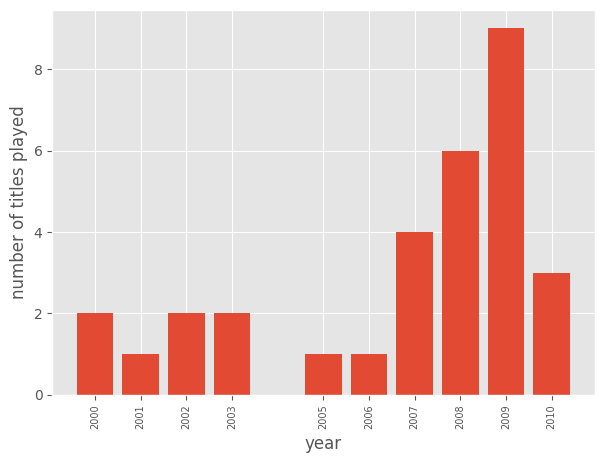

In [ ]:
# Create a barplot plot with y label as "number of titles played" and x -axis year
nbr_titles_played_by_year = df_final.groupby('year').title.nunique()

# Set the figure size
plt.figure(figsize=(7, 5))
#from the previous cell, we could see there is an abnormal year 0, which seems to be
#a default, so we're dropping that year
plt.bar(x=nbr_titles_played_by_year.index[1:], height=nbr_titles_played_by_year[1:])

# Set the x label of the plot
plt.xlabel('year')

# Set the y label of the plot
plt.ylabel('number of titles played')

# Setting all the ticks
plt.xticks(ticks=nbr_titles_played_by_year.index[1:], rotation=90, size=7)

# Show the plot
plt.show()

In [ ]:
# Instantiating Reader scale with expected rating scale
 #use rating scale (0, 5)
reader = Reader(rating_scale=(0, 5))

# Loading the dataset
 # Take only "user_id","song_id", and "play_count"
data = Dataset.load_from_df(df_final[['user_id',	'song_id', 'play_count']],
                            reader=reader)

# Splitting the data into train and test dataset
 # Take test_size = 0.4, random_state = 42
trainset, testset = train_test_split(data, test_size=0.4, random_state=42)

In [ ]:
# Build the default user-user-similarity model
sim_options=dict(name='cosine', user_based=True)

# KNN algorithm is used to find desired similar items
 # Use random_state = 1
sim_user_user_model = KNNBasic(sim_options=sim_options, random_state=1,
                               verbose=True)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user_model.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
 # Use sim_user_user model
precision_recall_at_k(sim_user_user_model, testset=testset)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.5210
Precision:  0.55
Recall:  0.824
F_1 score:  0.66


The new F1 score is 0.66. This is better than 0.51 obtained in the conclusion. The precision is still bad.

## Tuning the model

In [ ]:
# Setting up parameter grid to tune the hyperparameters
params_grid = dict(k=[60, 80, 100], min_k=[10, 40, 50],
                   sim_options=dict(name=['msd', 'cosine'],
                                    #min_support = [5, 10, 20],
                                    user_based=[True]))
# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid=params_grid, cv=3, measures=['rmse'],
                  n_jobs=-1)

# Fitting the data
 # Use entire data for GridSearch
gs.fit(data)

# Best RMSE score
print("Best RMSE score:", gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print("Best_params:", gs.best_params['rmse'])

# Train the best model found in above gridsearch
# Using the optimal similarity measure for user-user based collaborative filtering
best_params = gs.best_params['rmse']
best_k = best_params['k']
best_min_k = best_params['min_k']
best_sim_options = best_params['sim_options']

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_tuned_model = KNNBasic(k = best_k, min_k=best_min_k,
                                     sim_options=best_sim_options,
                                     random_state=1, verbose=False)

# Training the algorithm on the trainset
sim_user_user_tuned_model.fit(trainset)

# Let us compute precision@k and recall@k also
precision_recall_at_k(sim_user_user_tuned_model, testset=testset)

Best RMSE score: 1.3998637614150191
Best_params: {'k': 60, 'min_k': 10, 'sim_options': {'name': 'msd', 'user_based': True}}
RMSE: 1.4120
Precision:  0.55
Recall:  0.821
F_1 score:  0.659


Tuning has not increased the performance.

## Balancing the data

We only balance the trainset. As balancing the whole dataset would leak information of the testset in the training.  

In [ ]:
trainset_df = pd.DataFrame(trainset.build_testset(), columns = ['user_id', 'song_id', 'play_count'])

# We will oversample the under representated classes using smote
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

#balancing with smote
x, y = smote.fit_resample(trainset_df[['user_id', 'song_id']], trainset_df.play_count)

trainset_df_balanced = pd.concat([x,y], axis=1)

# converting the trainset balanced into suprise dataset
trainset_data_balanced = Dataset.load_from_df(trainset_df_balanced[['user_id',	'song_id', 'play_count']],
                            reader=reader)

# rebuild the trainset for surprise algorithms training
trainset_balanced = trainset_data_balanced.build_full_trainset()

# balanced the whole dataset for comparison purposes
x2, y2 = smote.fit_resample(df_final[['user_id', 'song_id']], df_final.play_count)
df_final_balanced = pd.concat([x2,y2], axis=1)
data_balanced = Dataset.load_from_df(df_final_balanced[['user_id',	'song_id', 'play_count']],
                            reader=reader)

In [ ]:
trainset_df_balanced.play_count.value_counts()

play_count
5.0    1956
1.0    1956
2.0    1956
3.0    1956
4.0    1956
Name: count, dtype: int64

In [ ]:
# Build the default user-user-similarity model
sim_options=dict(name='cosine', user_based=True)

# KNN algorithm is used to find desired similar items
 # Use random_state = 1
sim_user_user_model = KNNBasic(k = 40, min_k=1, sim_options=sim_options, random_state=1,
                               verbose=True)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user_model.fit(trainset_balanced)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
 # Use sim_user_user model
precision_recall_at_k(sim_user_user_model, k=30, threshold=1.5,testset=testset)

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.5292
Precision:  0.55
Recall:  0.824
F_1 score:  0.66


Balancing the data has not increased the F1 score

## Examining where the model is not performing well

In [ ]:
# Let's build a pandas dataframe with all the predictions
def get_Iu(uid):
    """Return the number of items rated by given user

    Args:
        uid: The raw id of the user.
    Returns:
        The number of items rated by the user.
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError:  # user was not part of the trainset
        return 0

def get_Ui(iid):
    """Return the number of users that have rated given item

    Args:
        iid: The raw id of the item.
    Returns:
        The number of users that have rated the item.
    """
    try:
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:  # item was not part of the trainset
        return 0


In [ ]:
predictions = sim_user_user_model.test(testset)
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)

In [ ]:
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]

In [ ]:
# Let's take a look at the best predictions of the algorithm
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
1625,4848,154,3.0,3.0,"{'was_impossible': True, 'reason': 'User and/o...",0,86,0.0
3298,23972,9931,2.0,2.0,"{'actual_k': 40, 'was_impossible': False}",2,117,0.0
2089,39813,8582,2.0,2.0,"{'actual_k': 40, 'was_impossible': False}",6,168,0.0
575,27727,352,3.0,3.0,"{'was_impossible': True, 'reason': 'User and/o...",0,184,0.0
1860,67753,6293,2.0,2.0,"{'actual_k': 40, 'was_impossible': False}",5,120,0.0
3324,27727,5943,3.0,3.0,"{'was_impossible': True, 'reason': 'User and/o...",0,96,0.0
2280,50098,9162,3.0,3.0,"{'was_impossible': True, 'reason': 'User and/o...",0,110,0.0
351,12020,7416,3.0,3.0,"{'actual_k': 40, 'was_impossible': False}",6,135,0.0
2006,27727,9262,3.0,3.0,"{'was_impossible': True, 'reason': 'User and/o...",0,108,0.0
1498,62126,8582,2.0,2.0,"{'actual_k': 40, 'was_impossible': False}",8,168,0.0


In [ ]:
trainset_df.query("song_id==154").user_id.nunique()

86

**|Ui|  is always big** (> 86), meaning that many users have played the target song in the trainset. **|Iu| is always very small**, meaning that the target user have note played many songs in the trainset.

So it is easy to find users who have listened the song (as they are many), hence it is to find **k** users similar to the target user. And as they are similar to the target user, it is likely that they will rate the target song as the target user.

**So all these predictions make sens.**

In [ ]:
# Now, let's look at the prediction with the biggest error
worst_predictions

,uid,iid,rui,est,details,Iu,Ui,err
1857,6840,154,5.0,1.750115,"{'actual_k': 40, 'was_impossible': False}",2,86,3.249885
2394,11387,9931,5.0,1.749322,"{'actual_k': 40, 'was_impossible': False}",4,117,3.250678
2033,29185,8582,5.0,1.722656,"{'actual_k': 40, 'was_impossible': False}",15,168,3.277344
777,9193,2672,5.0,1.713873,"{'actual_k': 40, 'was_impossible': False}",7,101,3.286127
2873,75456,9162,5.0,1.706098,"{'actual_k': 40, 'was_impossible': False}",7,110,3.293902
2488,74130,2672,5.0,1.697641,"{'actual_k': 40, 'was_impossible': False}",7,101,3.302359
1481,7113,154,5.0,1.678663,"{'actual_k': 35, 'was_impossible': False}",4,86,3.321337
1331,12355,2672,5.0,1.659427,"{'actual_k': 40, 'was_impossible': False}",11,101,3.340573
453,8401,7399,5.0,1.623082,"{'actual_k': 40, 'was_impossible': False}",21,99,3.376918
3010,25615,9931,5.0,1.500291,"{'actual_k': 40, 'was_impossible': False}",4,117,3.499709


**|Ui|  is always big** (> 86), meaning that many users have played the target song in the trainset. **|Iu| is always very small**, meaning that the target user have note played many songs in the trainset.

So it is easy to find users who have listened the song (as they are many), hence it is to find **k** users similar to the target user. And as they are similar to the target user, it is likely that they will rate the target song as the target user. But the predictions are not good. The explanation left is the taste of this song by this target is different from all his similar users.  

**So all these predictions are not good because we are in the cases of biased users.**

These are situations where baseline estimates would be quite helpful, in order to deal with highly biased users (and items).

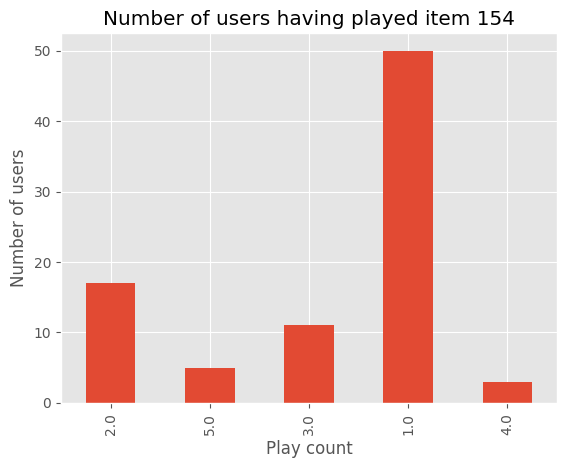

In [ ]:
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.style.use('ggplot')
counter = Counter([r for (_, r) in trainset.ir[trainset.to_inner_iid(154)]])
pd.DataFrame.from_dict(counter, orient='index').plot(kind='bar', legend=False)
plt.xlabel('Play count')
plt.ylabel('Number of users')
plt.title('Number of users having played item 154')
plt.show()

As we can see in the above figure, most of the users played the song only once and very small number played the song 5 times and our target user is among them. So he is a biased user.

**We can build another model for those biased users. And combine the models to create an hybrid recommendation system.**

## Customizing the KNNBasic algorithm

In [ ]:
from surprise.prediction_algorithms.knns import SymmetricAlgo

from surprise.prediction_algorithms.predictions import PredictionImpossible
from sklearn.ensemble import RandomForestRegressor

class CollaborativeRandomForest(SymmetricAlgo):
    """A basic collaborative filtering algorithm.

    The prediction :math:`\\hat{r}_{ui}` is set as:

    .. math::
        \\hat{r}_{ui} = \\frac{
        \\sum\\limits_{v \\in N^k_i(u)} \\text{sim}(u, v) \\cdot r_{vi}}
        {\\sum\\limits_{v \\in N^k_i(u)} \\text{sim}(u, v)}

    or

    .. math::
        \\hat{r}_{ui} = \\frac{
        \\sum\\limits_{j \\in N^k_u(i)} \\text{sim}(i, j) \\cdot r_{uj}}
        {\\sum\\limits_{j \\in N^k_u(i)} \\text{sim}(i, j)}

    depending on the ``user_based`` field of the ``sim_options`` parameter.

    Args:
        k(int): The (max) number of neighbors to take into account for
            aggregation (see :ref:`this note <actual_k_note>`). Default is
            ``40``.
        min_k(int): The minimum number of neighbors to take into account for
            aggregation. If there are not enough neighbors, the prediction is
            set to the global mean of all ratings. Default is ``1``.
        sim_options(dict): A dictionary of options for the similarity
            measure. See :ref:`similarity_measures_configuration` for accepted
            options.
        verbose(bool): Whether to print trace messages of bias estimation,
            similarity, etc.  Default is True.
    """

    def __init__(self, k=40, min_k=1, sim_options={}, verbose=True, **kwargs):

        SymmetricAlgo.__init__(self, sim_options=sim_options, verbose=verbose, **kwargs)
        self.k = k
        self.min_k = min_k
        self.rf = RandomForestRegressor()

    def compute_rating_and_sim_averages(self, neighbors):
        # compute weighted average
        sum_sim = sum_ratings = actual_k = rating = 0
        if (len(neighbors) != 0):
          for (sim, r) in neighbors:
              sum_sim += sim
              sum_ratings += sim * r
        else:
            rating = self.trainset.global_mean

        if sum_sim != 0 :
              rating = sum_ratings/sum_sim
        return (sum_sim, rating)

    def fit(self, trainset):
        SymmetricAlgo.fit(self, trainset)
        self.sim = self.compute_similarities()

        #The feature matrix
          # an observation in x is the wheighted average of similarities for each user.
          # For each user we compute the wheighted average of the similarities
          # of all the users who listened to a target song for all the songs in the training dataset

        X = []
        #The target, the play counts

        Y = []
        # an observation in Y is the wheighted average of play counts for each user.
          # For each user we compute the wheighted average of the play counts
          # of all the users who listened to a target song for all the songs in the training dataset
        for u in trainset.all_users():
          for i in trainset.all_items():
            x, y = self.switch(u, i)
            neighbors = [(self.sim[x, x2], r) for (x2, r) in self.yr[y]]
            n = self.compute_rating_and_sim_averages(neighbors)
            X.append(n[0])
            Y.append(n[1])

        self.rf.fit(np.array(X).reshape(-1, 1), Y)

        return self

    def estimate(self, u, i):
        if not (self.trainset.knows_user(u) and self.trainset.knows_item(i)):
            raise PredictionImpossible("User and/or item is unknown.")

        x, y = self.switch(u, i)

        neighbors = [(self.sim[x, x2], r) for (x2, r) in self.yr[y]]

        n = self.compute_rating_and_sim_averages(neighbors)[0]
        est = self.rf.predict(np.array(n).reshape(-1, 1))[0]

        details = {"actual_k": 6}
        return est, details

In [ ]:
# Build the default KNNBasicWithRandomForest model
sim_options=dict(name='cosine', user_based=True)

# KNN algorithm is used to find desired similar items
 # Use random_state = 1
sim_user_user_model = CollaborativeRandomForest(sim_options=sim_options,
                                               random_state=1, verbose=False)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user_model.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
 # Use sim_user_user model
precision_recall_at_k(sim_user_user_model, threshold=1.5, testset=testset)

RMSE: 1.5212
Precision:  0.55
Recall:  0.825
F_1 score:  0.66


The F1 score is still 0.66. So there is no improvement.

The performance of this model is not high. This is because we are using only one future, the weighted similarities. This is comparable to predicting the skin color of a person based on his age, it doesn't make much sense.

## Building an hybrid recommendation system:
 - We will use LightFM a newly discovered library

In [ ]:
# Installing lightfm
!pip install lightfm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.4/316.4 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lightfm: filename=lightfm-1.17-cp310-cp310-linux_x86_64.whl size=808332 sha256=d64d30146d7416b7fe06ca9cedc9b73684e7c816de8f801d9ac91613e4102458
  Stored in directory: /root/.cache/pip/wheels/4f/9b/7e/0b256f2168511d8fa4dae4fae0200fdbd729eb424a912ad636
Successfully built lightfm


In [ ]:
# Importing packages
from lightfm import LightFM
from lightfm.data import Dataset
from lightfm.evaluation import precision_at_k, recall_at_k, auc_score
from lightfm.cross_validation import random_train_test_split

In [ ]:
# Modifying the dataset cutoffs thresholds
# Get the column containing the users
df = df_copy
users = df.user_id

# Create a dictionary that maps users(listeners) to the number of songs that they have listened to
playing_count = dict()

for user in users:
    # If we already have the user, just add 1 to their playing count
    if user in playing_count:
        playing_count[user] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[user] = 1

# We want our users to have listened at least 90 songs
SONG_COUNT_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_songs in playing_count.items():

    if num_songs < SONG_COUNT_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]


# Get the column containing the songs
songs = df.song_id

# Create a dictionary that maps songs to its number of users(listeners)
playing_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their playing count
    if song in playing_count:
        playing_count[song] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[song] = 1

# We want our song to be listened by at least 120 users to be considred
LISTENER_COUNT_CUTOFF = 120

remove_songs = []

for song, num_users in playing_count.items():
    if num_users < LISTENER_COUNT_CUTOFF:
        remove_songs.append(song)

df_final = df.loc[ ~ df.song_id.isin(remove_songs)]

In [ ]:
# Caping the play count to 5
df_final.loc[df_final.play_count>5, 'play_count'] = 5

In [ ]:
# rescaling the playcount [0, 1]
df_final['play_count_scaled'] = 1 / df_final.play_count

In [ ]:
# Setting desired positive pairs (playcount>1.5 or play_count_scaled>0.3 ) to 1
# and negatives pairs to 0
df_final.loc[df_final['play_count_scaled'] < 0.3, 'play_count_scaled'] = 0
df_final.loc[df_final['play_count_scaled'] >= 0.3, 'play_count_scaled'] = 1

In [ ]:
# Defining users and songs sets
user_ids = set(df_final.user_id)
songs_ids = set(df_final.song_id)

In [ ]:
# Defining user features
nbr_user_listened_songs = df_final.groupby('user_id').play_count.count()
nbr_user_listened_songs = nbr_user_listened_songs / nbr_user_listened_songs.values.sum()

In [ ]:
# Defining songs features
df_final['text'] = df_final['title'] + ' ' + df_final['release'] + ' ' +  df_final['artist_name']

In [ ]:
# Create a Dataset object and fit users, songs, and features
dataset = Dataset()
dataset.fit(users=user_ids,
            items=songs_ids,
            user_features = set(nbr_user_listened_songs),
            item_features = set(df_final.text))


# Build interactions and features
interactions = [(x[0], x[1], x[2]) for x in df_final[['user_id', 'song_id', 'play_count_scaled']].values]
(interactions, weights) = dataset.build_interactions(interactions)

In [ ]:
# Split the interactions matrix into a train and test set
test_ratio = 0.2
train_interactions, test_interactions = random_train_test_split(interactions, test_percentage=test_ratio, random_state=2)
train_weights, test_weights = random_train_test_split(weights, test_percentage=test_ratio, random_state=2)

In [ ]:
# Builiding user features
user_features = list(zip(nbr_user_listened_songs.index, nbr_user_listened_songs.apply(lambda x: [x])))
user_features = dataset.build_user_features(user_features)


# Builiding items features
item_features = list((x[0], [x[1]]) for x in df_final[['song_id', 'text']].drop_duplicates().values)
item_features = dataset.build_item_features(item_features)

In [ ]:
# Creating the LightFM model
basic_lfm = LightFM(
    no_components=150,
    learning_rate=0.05,
    loss='warp',
    item_alpha=0.0001,
    user_alpha=0.0001,
    random_state=200)

In [ ]:
# Training the model
basic_lfm.fit(train_interactions,
          sample_weight=train_weights,
          user_features=user_features,
          item_features=item_features,
          epochs=50, num_threads=50, verbose=True)

Epoch: 100%|██████████| 50/50 [00:52<00:00,  1.05s/it]


In [ ]:
# A function to evaluate the model using LightFm evaluation metrics
def evaluate_lfm_model(model, test_interactions, user_features, item_features,
                       k=30):
  # compute the auc
  print('AUC', np.nanmean(auc_score(model,
                                    test_interactions,
                                    user_features=user_features,
                                    item_features=item_features)))
  # calculate precision_at_k
  precision = precision_at_k(model,
                                  test_interactions,
                                  user_features=user_features,
                                  item_features=item_features,
                                  k=k
                                  ).mean()
  print("Precision:", precision)


  # calculate recall_at_k
  recall = recall_at_k(model,
                            test_interactions,
                            user_features=user_features,
                            item_features=item_features,
                            k=k).mean()
  print("Recall:", recall)

  # Calculate f1_score_at_k
  f1_score = 2 * precision * recall / (recall + precision)
  print("F1_score:", f1_score)

In [ ]:
# Evaluating the performance of the model using lightfm evaluation metrics
evaluate_lfm_model(basic_lfm, test_interactions, user_features,
                   item_features, 30)

AUC 0.7671651
Precision: 0.029273298
Recall: 0.16732867337841772
F1_score: 0.049829226368503614


The AUC is 0.76. It measures the probability that a randomly chosen positive interaction (e.g., a user liking a song) is ranked higher by the model than a randomly chosen negative interaction (e.g., a user not liking a song)

### Let's evaluate the performance of the model with a threshold in Surprise library manner

In [ ]:
# Evaluating the model in an explicit feedback manner
# Let's get the predictions and actual playcount for every user-song pair in the testset
def get_predictions(model, df_final, dataset, test_interactions):

  # Get the mappings
  user_id_mapping, user_feature_mapping, item_id_mapping, item_feature_mapping = dataset.mapping()

  # Create reverse mappings
  reverse_user_id_mapping = {v: k for k, v in user_id_mapping.items()}
  reverse_item_id_mapping = {v: k for k, v in item_id_mapping.items()}

  df_interactions = df_final[['user_id', 'song_id', 'play_count_scaled']]

  # Function to get real ratings using internal IDs
  def get_real_rating(internal_user_id, internal_item_id, real_user_id = None,
                      real_item_id = None):
      if not real_user_id:
        real_user_id = reverse_user_id_mapping.get(internal_user_id, None)
      if not real_item_id:
        real_item_id = reverse_item_id_mapping.get(internal_item_id, None)
      if real_user_id is not None and real_item_id is not None:
          rating = df_interactions.loc[
              (df_interactions['user_id'] == real_user_id) &
              (df_interactions['song_id'] == real_item_id), 'play_count_scaled']
          if not rating.empty:
              return rating.values[0]
      return None


  # Function to get real user_id and item_id
  def get_real_ids(internal_user_id, internal_item_id):
      # Reverse the user_id_mapping and item_id_mapping to map internal IDs to real IDs
      real_user_id = {v: k for k, v in user_id_mapping.items()}[internal_user_id]
      real_item_id = {v: k for k, v in item_id_mapping.items()}[internal_item_id]
      return real_user_id, real_item_id


  user_song_pairs = test_interactions.nonzero()
  user_and_song_iternal_ids = list(zip(user_song_pairs[0], user_song_pairs[1]))

  ests = []
  trues = []
  user_est_true_lfm = defaultdict(list)
  for iternal_user, internal_song in user_and_song_iternal_ids:

    real_user_id, real_item_id = get_real_ids(iternal_user, internal_song)

    score = model.predict(int(iternal_user), [int(internal_song)])[0]
    playcount = get_real_rating(iternal_user, internal_song, real_user_id, real_item_id)
    user_est_true_lfm[real_user_id].append((score, playcount))
    ests.append(score)
    trues.append(playcount)

  return user_est_true_lfm, ests, trues



# Let's customize the precision_recall_at_k function
def precision_recall_at_k_lfm(k=30, threshold=0, user_est_true=None):
    """Return precision and recall at k metrics for each user"""

    precisions = dict()
    recalls = dict()

    for uid, playing_count in user_est_true.items():

        # Sort play count by estimated value
        playing_count.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in playing_count)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in playing_count[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in playing_count[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0


    #Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)),3)
    #Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)),3)

    #accuracy.rmse(predictions)
    print('Precision: ', precision) #Command to print the overall precision
    print('Recall: ', recall) #Command to print the overall recall
    print('F_1 score: ', round((2*precision*recall)/(precision+recall),3)) # Formula to compute the F-1 score.

In [ ]:
# getting the prediction for each user-pair of the testset
user_est_true_lfm = get_predictions(basic_lfm, df_final, dataset, test_interactions)
ests = user_est_true_lfm[1]
print('min_est_score:', min(ests))
print('max_est_score:', max(ests))

min_est_score: -7.2498407
max_est_score: 5.147733


In [ ]:
# evaluate the model with a threshold
precision_recall_at_k_lfm(user_est_true=user_est_true_lfm[0], threshold=-1)

Precision:  0.959
Recall:  0.68
F_1 score:  0.796


### Rebuilidng the model by transforming the item features with a vectorizer

In [ ]:
# Taking a sample of the dataset
df_final = df_final.sample(3000, random_state=42)

# Defining users and songs sets
user_ids = set(df_final.user_id)
songs_ids = set(df_final.song_id)

# Defining user features
nbr_user_listened_songs = df_final.groupby('user_id').play_count.count()
nbr_user_listened_songs = nbr_user_listened_songs / nbr_user_listened_songs.values.sum()

# Defining songs features
df_final['text'] = df_final['title'] + ' ' + df_final['release'] + ' ' +  df_final['artist_name']

# Create tfidf vectorizer
tfidf = TfidfVectorizer(tokenizer = tokenize)

# Creating the songs tfidf
songs_tfidf = tfidf.fit_transform(df_final['text'].values).toarray()

# Create a Dataset object and fit users, songs, and features
dataset = Dataset()
dataset.fit(users=user_ids, items=songs_ids,
            user_features = set(nbr_user_listened_songs),
            item_features = set(songs_tfidf.ravel()))


# Build interactions and features
interactions = [(x[0], x[1], x[2]) for x in df_final[['user_id', 'song_id', 'play_count_scaled']].values]
(interactions, weights) = dataset.build_interactions(interactions)


# Split the interactions matrix into a train and test set
test_ratio = 0.2
train_interactions, test_interactions = random_train_test_split(interactions, test_percentage=test_ratio, random_state=2)
train_weights, test_weights = random_train_test_split(weights, test_percentage=test_ratio, random_state=2)


# Builiding user features
user_features = list(zip(nbr_user_listened_songs.index, nbr_user_listened_songs.apply(lambda x: [x])))
user_features = dataset.build_user_features(user_features)


# Builiding items features
  # Map item IDs to the order of the TF-IDF matrix
item_features_map = dict(zip(songs_ids, songs_tfidf))
  # Fit the dataset with item features
dataset.fit_partial(items=songs_ids, item_features=range(songs_tfidf.shape[1]))

itl = []
  # Build the item features list
for item_id in songs_ids:
  for i, value in enumerate(item_features_map[item_id]):
    itl.append((item_id, (i, value)))

item_features = dataset.build_item_features(itl)


vectorized_lfm = LightFM(
    no_components=150,
    learning_rate=0.05,
    loss='warp',
    random_state=200)


vectorized_lfm.fit(train_interactions,
          sample_weight=train_weights,
          user_features=user_features,
          item_features=item_features,
          epochs=50, num_threads=50, verbose=True)

Epoch: 100%|██████████| 50/50 [07:22<00:00,  8.84s/it]


In [ ]:
# Evaluating the model with lightfm evaluation metrics
evaluate_lfm_model(vectorized_lfm, test_interactions, user_features,
                   item_features, 30)

AUC 0.56468457
Precision: 0.0035021894
Recall: 0.09036898061288305
F1_score: 0.006743056195333613


The AUC has not improved
 - It is due to the small number of observations used to train the model.
 - With the same number of observations this approach gives a slightly better performance.  

In [ ]:

# getting the prediction for each user-pair of the testset
user_est_true_lfm = get_predictions(vectorized_lfm, df_final, dataset, test_interactions)
ests = user_est_true_lfm[1]
print('min_est_score:', min(ests))
print('max_est_score:', max(ests))

min_est_score: -1.80968
max_est_score: 0.08069802


In [ ]:
# evaluate the model with a threshold in Surprise manner
precision_recall_at_k_lfm(user_est_true=user_est_true_lfm[0], threshold=-0.01)

Precision:  0.368
Recall:  0.357
F_1 score:  0.362


With no surprise the threshold evaluation f1 score is not better.

## Final Conclusion

**We improved the F1 score of the user user collaborative filtering model by 0.15 points (0.66 vs 0.51 before)** just by:
 - changing the **cutoffs thresholds**
 - **dropping old observations**
 - **caping the play counts** greater than 5 **to 5**.

Balancing the data and creating a custom Random Forest model have not improved the performance.  

We have also built an **hybrid recommendation system** using the LightFm library. The AUC obtained with a basic hybrid model is 0.76.
The results can be improved provided:
- more computer power to perform the training.
- more data on users, for example demographic or behavior data.
- more data on songs, for example the genre or the category of a song.  